---
title: "Homework 2"
format: html
---

__Due Date:__ 2022-10-16 at 8:30 AM PT
---


__Name:__ Luke Schlake



For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

## Preparation

1. Create a 'data' folder in the root directory of this repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.

## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [10]:
cd "C:\\Users\\lschlake\\Documents\\2024-2025Courses\\PRGS-Intro-to-ML-2024-1"

C:\Users\lschlake\Documents\2024-2025Courses\PRGS-Intro-to-ML-2024-1


C:\Users\lschlake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile 

#with zipfile.ZipFile("data/raw/NRI_Table_Counties.zip","r") as f:
#    f.extractall("data/raw/NRI")

NRI_data= pd.read_csv("data/raw/NRI/NRI_Table_Counties.csv")

In [12]:
NRI_data.head(10)
print(NRI_data.columns)

Index(['OID_', 'NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY',
       'COUNTYTYPE', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       ...
       'WNTW_EALS', 'WNTW_EALR', 'WNTW_ALRB', 'WNTW_ALRP', 'WNTW_ALRA',
       'WNTW_ALR_NPCTL', 'WNTW_RISKV', 'WNTW_RISKS', 'WNTW_RISKR', 'NRI_VER'],
      dtype='object', length=465)


In [13]:
NRI_data["STCOFIPS"]

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3226    72151
3227    72153
3228    78010
3229    78020
3230    78030
Name: STCOFIPS, Length: 3231, dtype: int64

__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [14]:
#Filter for specific columns 
NRI_filtered = pd.DataFrame()
NRI_filtered["FIPS"] = NRI_data["STCOFIPS"]
for p in NRI_data.columns:
    if p.endswith("_AFREQ") | p.endswith("_RISKR"):
        NRI_filtered[p]=NRI_data[p]
NRI_filtered.columns


Index(['FIPS', 'AVLN_AFREQ', 'AVLN_RISKR', 'CFLD_AFREQ', 'CFLD_RISKR',
       'CWAV_AFREQ', 'CWAV_RISKR', 'DRGT_AFREQ', 'DRGT_RISKR', 'ERQK_AFREQ',
       'ERQK_RISKR', 'HAIL_AFREQ', 'HAIL_RISKR', 'HWAV_AFREQ', 'HWAV_RISKR',
       'HRCN_AFREQ', 'HRCN_RISKR', 'ISTM_AFREQ', 'ISTM_RISKR', 'LNDS_AFREQ',
       'LNDS_RISKR', 'LTNG_AFREQ', 'LTNG_RISKR', 'RFLD_AFREQ', 'RFLD_RISKR',
       'SWND_AFREQ', 'SWND_RISKR', 'TRND_AFREQ', 'TRND_RISKR', 'TSUN_AFREQ',
       'TSUN_RISKR', 'VLCN_AFREQ', 'VLCN_RISKR', 'WFIR_AFREQ', 'WFIR_RISKR',
       'WNTW_AFREQ', 'WNTW_RISKR'],
      dtype='object')

__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [15]:
data = pd.DataFrame(NRI_filtered.isnull().sum())
print(data)

               0
FIPS           0
AVLN_AFREQ  3023
AVLN_RISKR     0
CFLD_AFREQ  2646
CFLD_RISKR     0
CWAV_AFREQ     0
CWAV_RISKR     0
DRGT_AFREQ     7
DRGT_RISKR     0
ERQK_AFREQ     0
ERQK_RISKR     0
HAIL_AFREQ     7
HAIL_RISKR     0
HWAV_AFREQ     0
HWAV_RISKR     0
HRCN_AFREQ   918
HRCN_RISKR     0
ISTM_AFREQ   229
ISTM_RISKR     0
LNDS_AFREQ    40
LNDS_RISKR     0
LTNG_AFREQ   123
LTNG_RISKR     0
RFLD_AFREQ     0
RFLD_RISKR     0
SWND_AFREQ     7
SWND_RISKR     0
TRND_AFREQ     7
TRND_RISKR     0
TSUN_AFREQ  3103
TSUN_RISKR     0
VLCN_AFREQ  3125
VLCN_RISKR     0
WFIR_AFREQ    88
WFIR_RISKR     0
WNTW_AFREQ     0
WNTW_RISKR     0


__4. Show the cross-tabulation of the 'AVLN_AFREQ' and 'AVLN_RISKR' columns (including missing values). What do you observe?__

In [16]:
crosstab = pd.crosstab(NRI_filtered["AVLN_AFREQ"],NRI_filtered["AVLN_RISKR"])
print(crosstab)

AVLN_RISKR  Relatively High  Relatively Low  Relatively Moderate  Very High  \
AVLN_AFREQ                                                                    
0.010000                  0               0                    0          0   
0.016667                  0               0                    0          0   
0.033333                  0              14                    0          0   
0.050000                  0              10                    2          0   
0.066667                  0              12                    4          0   
0.083333                  0               5                    3          0   
0.100000                  0               1                    2          0   
0.116667                  0               2                    4          0   
0.133333                  0               1                    6          0   
0.150000                  0               4                    3          0   
0.166667                  0               0         

__5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [17]:
for p in NRI_data.columns:
    if p.endswith("_AFREQ"):
        NRI_filtered[p]=NRI_data[p].fillna(0)

NRI_filtered["FIPS"]=NRI_filtered["FIPS"].astype(str)

## Task 2 - SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [18]:
SVI_data= pd.read_csv("data/raw/SVI_2022_US_county.csv")
SVI_data["FIPS"]=SVI_data["FIPS"].astype(str)
#FIPS is successfully changed to an object

__1. Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`

In [19]:
list = ["ST", "STATE", "ST_ABBR", "STCNTY", "COUNTY", "FIPS", "LOCATION", 
        "AREA_SQMI", "E_TOTPOP", "EP_POV150", "EP_UNEMP", "EP_HBURD",
          "EP_NOHSDP", "EP_UNINSUR", "EP_AGE65", "EP_AGE17", "EP_DISABL",
            "EP_SNGPNT", "EP_LIMENG", "EP_MINRTY", "EP_MUNIT", "EP_MOBILE", 
            "EP_CROWD", "EP_NOVEH", "EP_GROUPQ", "EP_NOINT", "EP_AFAM", "EP_HISP", 
            "EP_ASIAN", "EP_AIAN", "EP_NHPI", "EP_TWOMORE", "EP_OTHERRACE"]

SVI_filtered=pd.DataFrame()

for x in list:
    SVI_filtered[x]=SVI_data[x]

SVI_filtered["FIPS"]=SVI_filtered["FIPS"].astype(str)
NRI_filtered["FIPS"]=NRI_filtered["FIPS"].astype(str)

__2. Create a table / dataframe that shows the number of missing values in each column. (Hint: if you wrote a function for Task 1, you can reuse it here.)__

In [20]:
data = pd.DataFrame(SVI_filtered.isnull().sum())
print(data)

              0
ST            0
STATE         0
ST_ABBR       0
STCNTY        0
COUNTY        0
FIPS          0
LOCATION      0
AREA_SQMI     0
E_TOTPOP      0
EP_POV150     0
EP_UNEMP      0
EP_HBURD      0
EP_NOHSDP     0
EP_UNINSUR    0
EP_AGE65      0
EP_AGE17      0
EP_DISABL     0
EP_SNGPNT     0
EP_LIMENG     0
EP_MINRTY     0
EP_MUNIT      0
EP_MOBILE     0
EP_CROWD      0
EP_NOVEH      0
EP_GROUPQ     0
EP_NOINT      0
EP_AFAM       0
EP_HISP       0
EP_ASIAN      0
EP_AIAN       0
EP_NHPI       0
EP_TWOMORE    0
EP_OTHERRACE  0


## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

In [26]:
#All the missing NRI missing FIPS codes in the SVI begin with 7 and are 5 digits (or are close to a FIPS code beginning with 7, ex: 69001)
#I used RANDChat for this block to determine the use of the .isin function
NRI_filtered["matches"] = NRI_filtered["FIPS"].isin(SVI_filtered["FIPS"])
NRI_filtered[["matches","FIPS"]].sort_values(by="matches",ascending=True)
pd.set_option("display.max_rows", 20)
NRI_filtered[["matches","FIPS"]]

,matches,FIPS
0,True,1001
1,True,1003
2,True,1005
3,True,1007
4,True,1009
...,...,...
3226,False,72151
3227,False,72153
3228,False,78010
3229,False,78020


In [27]:
#All the missing NRI missing FIPS codes in the SVI begin with 9 and are 4 digits
SVI_filtered["matches"] = SVI_filtered["FIPS"].isin(NRI_filtered["FIPS"])
SVI_filtered[["matches","FIPS"]].sort_values(by="matches",ascending=False)

,matches,FIPS
0,True,1001
2088,True,39087
2090,True,39091
2091,True,39093
2092,True,39095
...,...,...
314,False,9160
315,False,9170
316,False,9180
317,False,9190


__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [28]:
merged_data = pd.merge(SVI_filtered, NRI_filtered, on="FIPS",how="outer")
merged_data.head(10)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,EP_POV150,...,TRND_RISKR,TSUN_AFREQ,TSUN_RISKR,VLCN_AFREQ,VLCN_RISKR,WFIR_AFREQ,WFIR_RISKR,WNTW_AFREQ,WNTW_RISKR,matches_y
0,10.0,Delaware,DE,10001.0,Kent County,10001,"Kent County, Delaware",586.060790,182400.0,20.1,...,Relatively Moderate,0.0,Insufficient Data,0.0,Not Applicable,0.001183,Relatively Low,2.815900,Relatively High,True
1,10.0,Delaware,DE,10003.0,New Castle County,10003,"New Castle County, Delaware",426.336508,570567.0,16.5,...,Relatively Moderate,0.0,Insufficient Data,0.0,Not Applicable,0.000668,Relatively Low,3.503866,Very High,True
2,10.0,Delaware,DE,10005.0,Sussex County,10005,"Sussex County, Delaware",936.145129,240668.0,18.5,...,Relatively Low,0.0,Insufficient Data,0.0,Not Applicable,0.001188,Relatively Moderate,2.573031,Relatively High,True
3,1.0,Alabama,AL,1001.0,Autauga County,1001,"Autauga County, Alabama",594.454786,58761.0,20.2,...,Relatively Moderate,0.0,Not Applicable,0.0,Not Applicable,0.000035,Very Low,0.433437,Very Low,True
4,1.0,Alabama,AL,1003.0,Baldwin County,1003,"Baldwin County, Alabama",1589.861817,233420.0,18.3,...,Relatively Moderate,0.0,Insufficient Data,0.0,Not Applicable,0.002229,Relatively Moderate,0.182759,Relatively Low,True
5,1.0,Alabama,AL,1005.0,Barbour County,1005,"Barbour County, Alabama",885.007619,24877.0,37.7,...,Relatively Moderate,0.0,Not Applicable,0.0,Not Applicable,0.000038,Very Low,0.185759,Very Low,True
6,1.0,Alabama,AL,1007.0,Bibb County,1007,"Bibb County, Alabama",622.469286,22251.0,29.0,...,Relatively Moderate,0.0,Not Applicable,0.0,Not Applicable,0.000040,Very Low,0.743034,Very Low,True
7,1.0,Alabama,AL,1009.0,Blount County,1009,"Blount County, Alabama",644.890376,59077.0,22.9,...,Relatively Moderate,0.0,Not Applicable,0.0,Not Applicable,0.000035,Very Low,0.866873,Very Low,True
8,1.0,Alabama,AL,1011.0,Bullock County,1011,"Bullock County, Alabama",622.814753,10328.0,47.4,...,Relatively Low,0.0,Not Applicable,0.0,Not Applicable,0.000074,Very Low,0.247678,Very Low,True
9,1.0,Alabama,AL,1013.0,Butler County,1013,"Butler County, Alabama",776.838208,18981.0,33.8,...,Relatively Low,0.0,Not Applicable,0.0,Not Applicable,0.000034,Very Low,0.185759,Very Low,True


__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [29]:
missing_data=merged_data.isnull().sum()
missing_data

ST            96
STATE         96
ST_ABBR       96
STCNTY        96
COUNTY        96
              ..
WFIR_AFREQ     9
WFIR_RISKR     9
WNTW_AFREQ     9
WNTW_RISKR     9
matches_y      9
Length: 71, dtype: int64

## Task 4 - Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values. (Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

ST


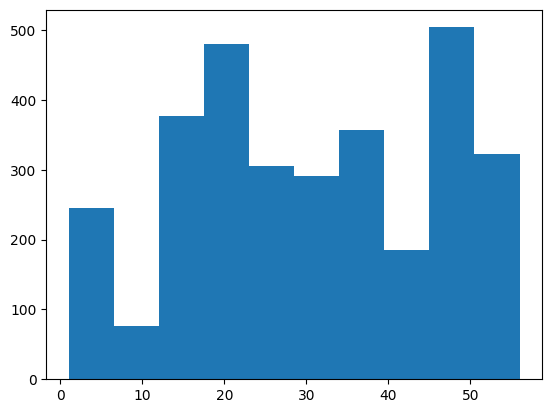

STCNTY


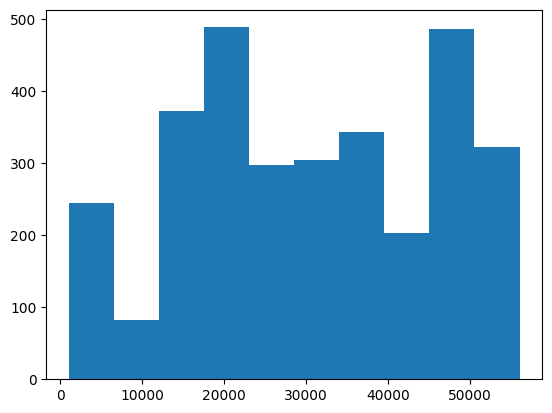

FIPS


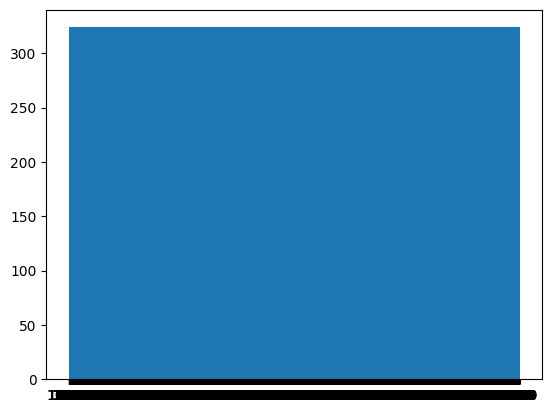

AREA_SQMI


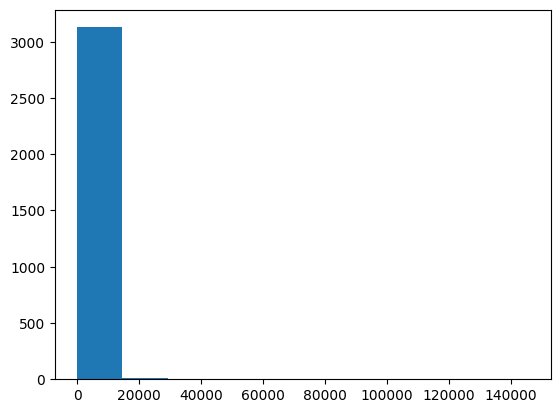

E_TOTPOP


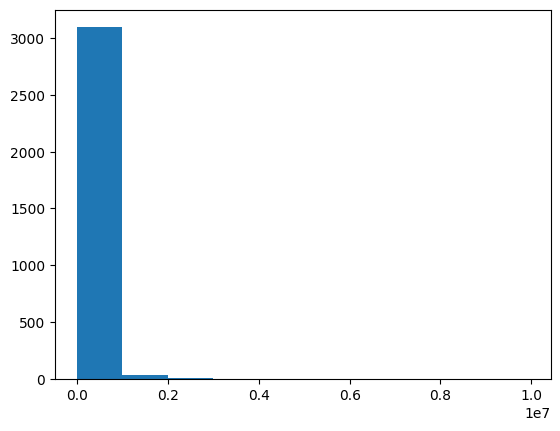

EP_POV150


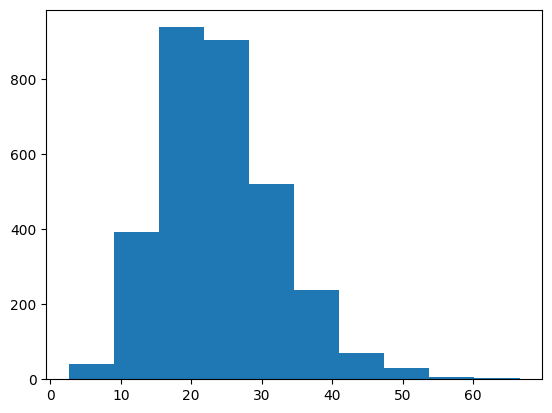

EP_UNEMP


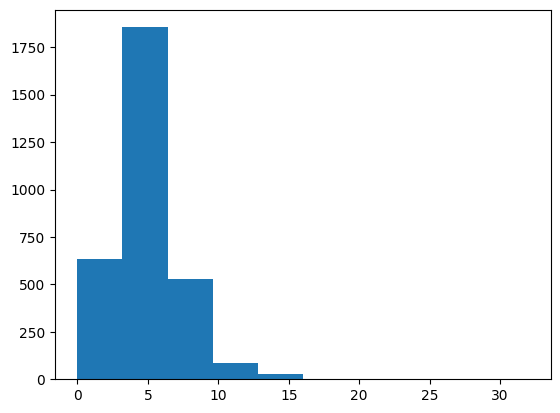

EP_HBURD


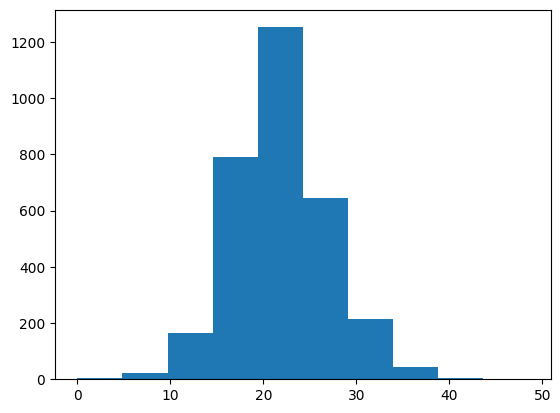

EP_NOHSDP


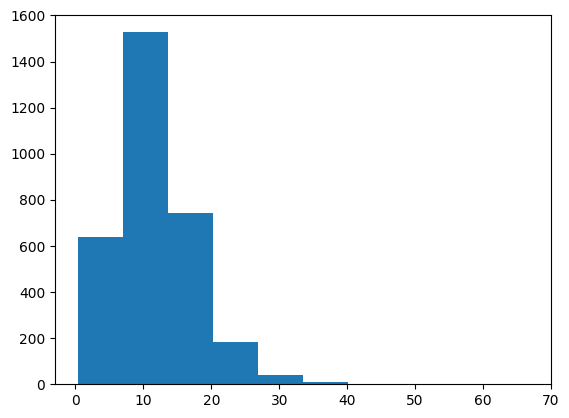

EP_UNINSUR


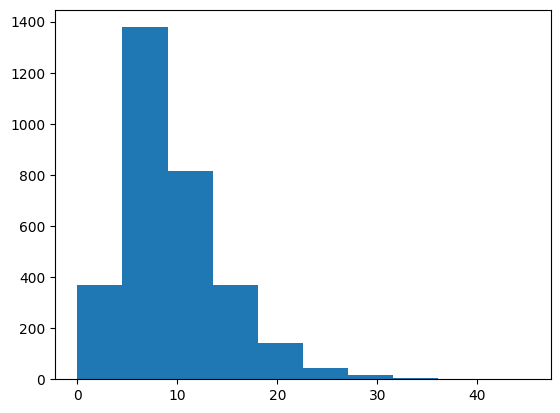

EP_AGE65


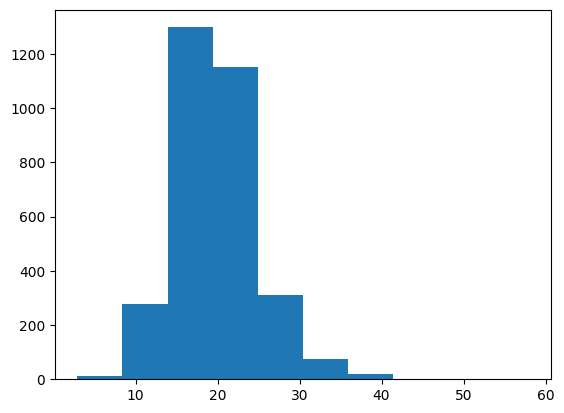

EP_AGE17


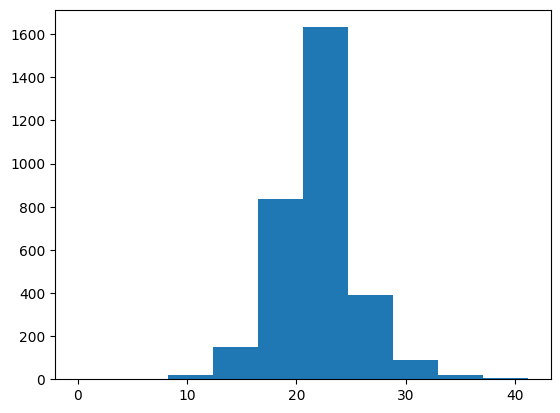

EP_DISABL


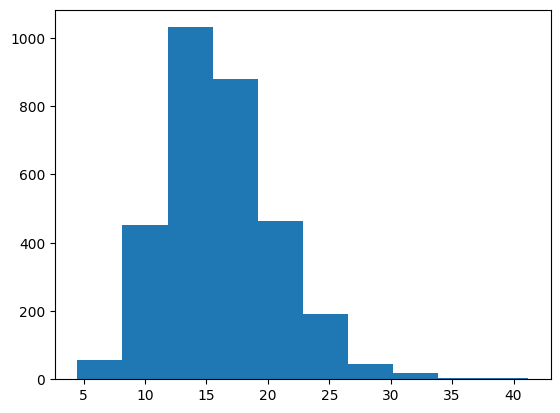

EP_SNGPNT


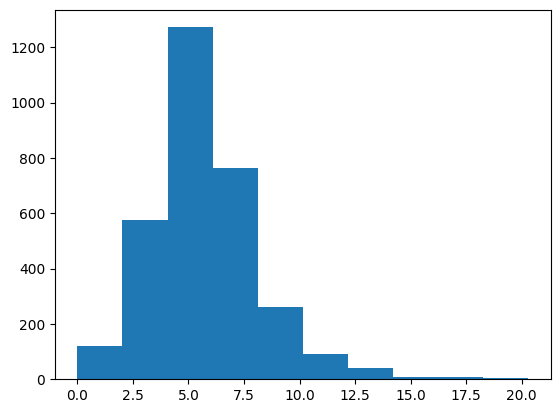

EP_LIMENG


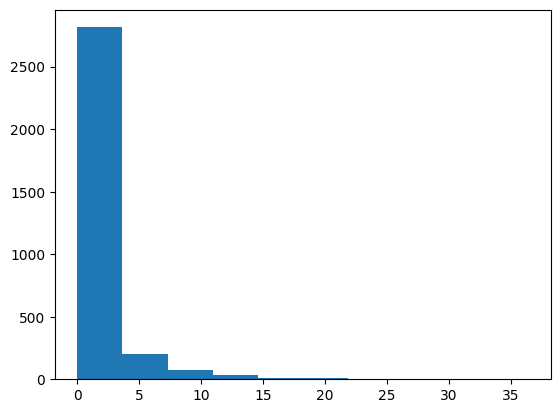

EP_MINRTY


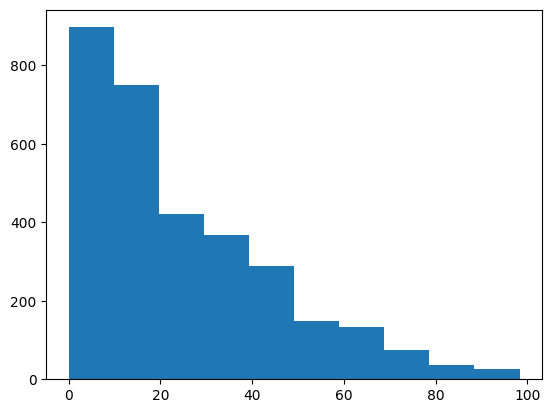

EP_MUNIT


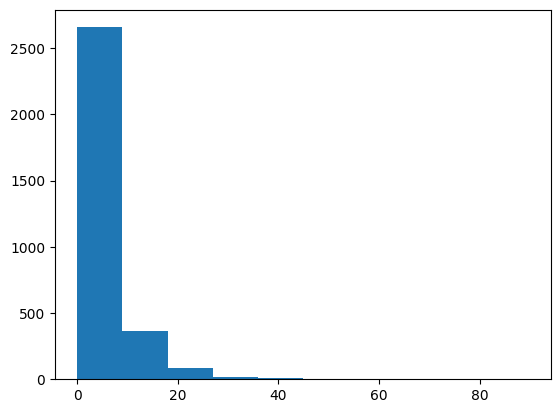

EP_MOBILE


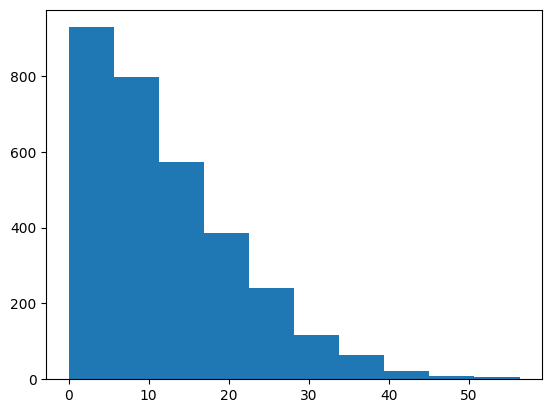

EP_CROWD


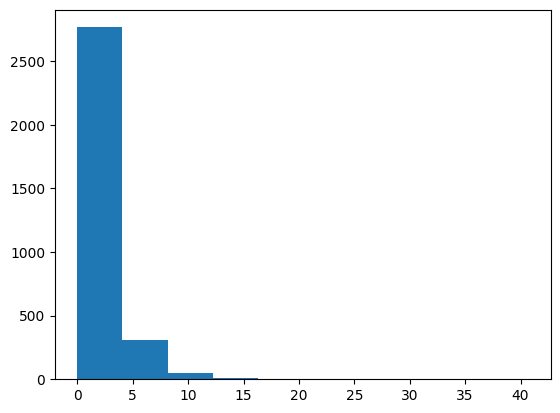

EP_NOVEH


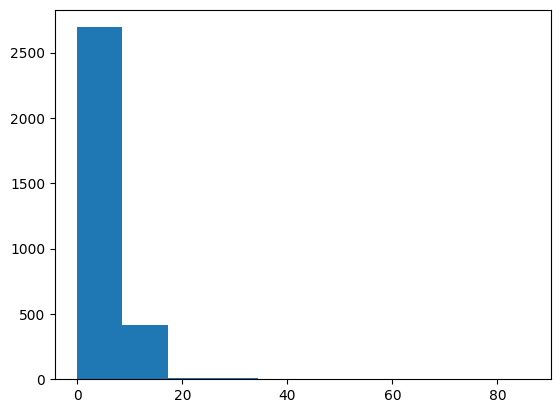

EP_GROUPQ


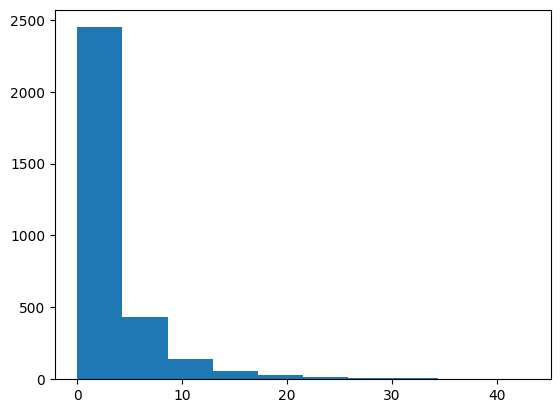

EP_NOINT


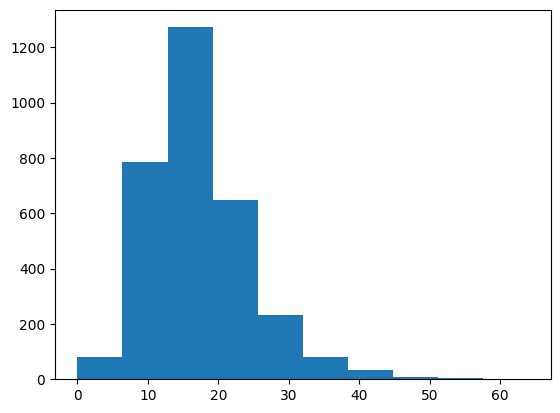

EP_AFAM


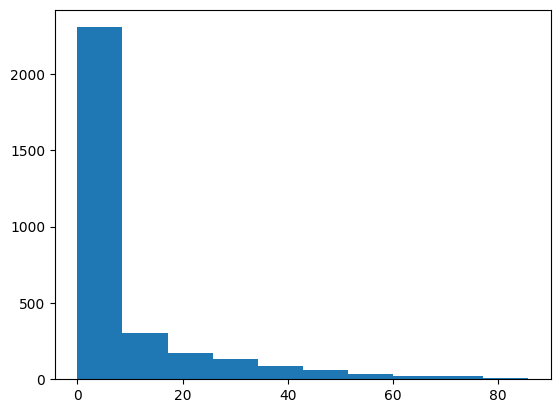

EP_HISP


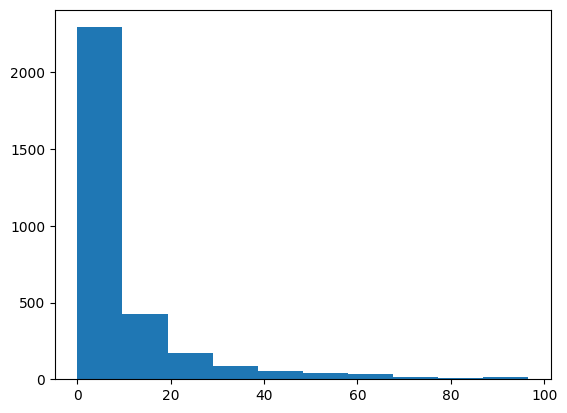

EP_ASIAN


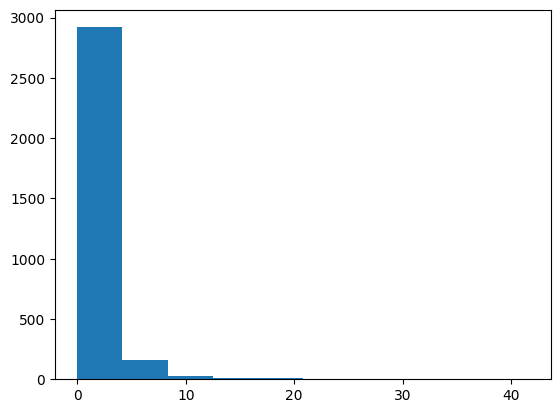

EP_AIAN


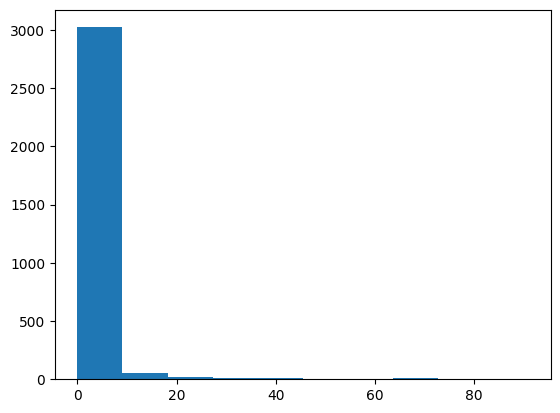

EP_NHPI


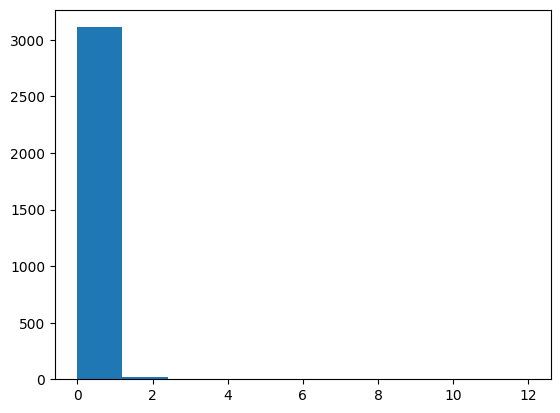

EP_TWOMORE


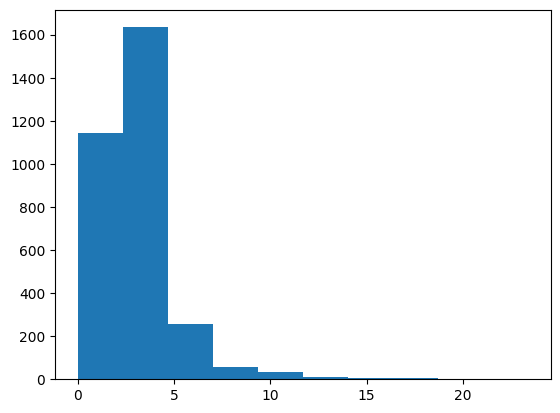

EP_OTHERRACE


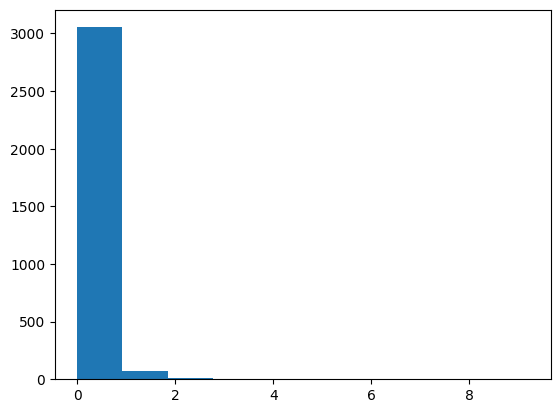

matches_x


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

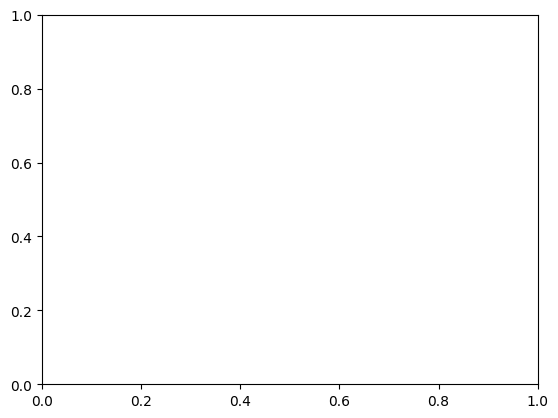

In [30]:
import matplotlib.pyplot as plt

merged_data.to_csv("C:\\Users\\lschlake\\Documents\\2024-2025Courses\\PRGS-Intro-to-ML-2024-1\\data\\processed\\merged_data.csv")

#I used RANDchat to generate the is_number function and to see how the .apply/.all function was used to call is_number
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

for p in merged_data.columns:
    numeric = merged_data[p].apply(is_number).all()
    if numeric==True:
        print(p)
        plt.hist(merged_data[p])
        plt.show()
